# Read Dataset

In [6]:
import pandas as pd

# Load the dataset
file_path = 'raw_sales.csv'  # Replace with your file path
data = pd.read_csv(file_path)

data.head()


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


We have successfully preprocessed the data and created a new aggregated dataset with the following columns:

* year_month: Represents the year and month of the sales.
* postcode: The postal code where the sales occurred.
* average_price: The average price of properties sold in that month and postcode.
* total_sales: The total number of sales in that month and postcode.

In [7]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'datesold' to datetime format and create a 'year_month' column
data['datesold'] = pd.to_datetime(data['datesold'])
data['year_month'] = data['datesold'].dt.to_period('M')

# Aggregate data by 'year_month' and 'postcode'
aggregated_data = data.groupby(['year_month', 'postcode']).agg(
    average_price=('price', 'mean'),
    total_sales=('price', 'count')
).reset_index()

# Scale the features for clustering
features = aggregated_data[['average_price', 'total_sales']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_data['cluster'] = kmeans.fit_predict(scaled_features)



# Visualize the clusters

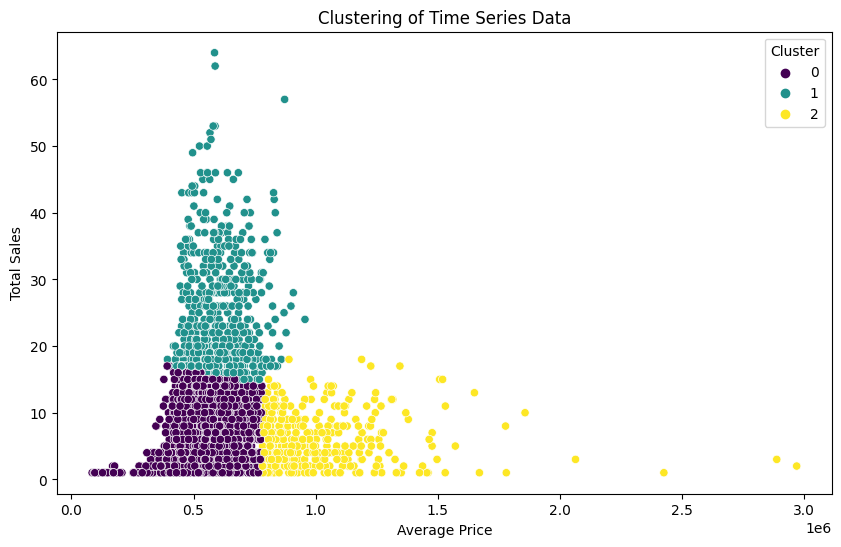

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aggregated_data, x='average_price', y='total_sales', hue='cluster', palette='viridis')
plt.title('Clustering of Time Series Data')
plt.xlabel('Average Price')
plt.ylabel('Total Sales')
plt.legend(title='Cluster')
plt.show()

The clustering of the time series data is visualized in the scatter plot above. Each point represents a combination of average_price and total_sales for a given month and postcode, and the points are colored based on the cluster they belong to.

This visualization helps in understanding how the sales data clusters into different groups based on the average price and total sales. For instance, one cluster might represent areas with high average prices and low sales volume, while another might represent areas with lower prices and higher sales volumes.